In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
url = 'https://raw.githubusercontent.com/nttuan8/DL_Tutorial/master/L2/dataset.csv'
df = pd.read_csv(url)
df.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [25]:
df = df.values
N, d = df.shape
x = df[:, 0:d-1].reshape(-1, d-1)
y = df[:, 2].reshape(-1, 1)

In [26]:
def sigmoid(x):
        return 1.0 / (1.0+np.exp(-x))
    
class LogisticRegression:
    def __init__(self, num_of_iteration, lr, w = None):
        self.w = w
        self.num_of_iteration = num_of_iteration
        self.lr = lr
        
    def coef(self):
        return self.w
        
    def fit(self, x, y):
        N, d = x.shape
        x = np.hstack((np.ones((N, 1)), x))
        self.w = np.array([0.,0.1,0.1]).reshape(-1,1)
        for i in range(1, self.num_of_iteration):
            y_predict = sigmoid(np.dot(x, self.w))
            cost = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
            self.w = self.w - self.lr * np.dot(x.T, y_predict - y)

In [27]:
model = LogisticRegression(num_of_iteration=1000, lr=0.01)

In [28]:
model.fit(x, y)
model.coef()

array([[-7.25683504],
       [ 0.62975152],
       [ 3.6436906 ]])

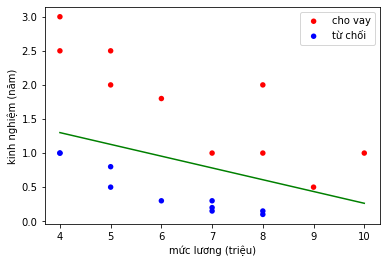

In [29]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

t = 0.5
plt.plot((4, 10),(-(model.w[0]+4*model.w[1]+ np.log(1/t-1))/model.w[2], -(model.w[0] + 10*model.w[1]+ np.log(1/t-1))/model.w[2]), 'g')
plt.show()